<a href="https://colab.research.google.com/github/YeongLee-Smart/SUMAN/blob/main/20240911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#module

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive

# Data Load

In [2]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/2024. 8._금융데이터 분석_메타코드/팀 프로젝트 소스/creditcard.csv'
data = pd.read_csv(file_path)
data

Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Train, Test 분리

In [4]:
# 1. X, y 분리
X= data.iloc[:, :-1]
y= data.iloc[:, -1]
# print(X) # Time~Amount
# print(y) # Class

# 2. 결측치 확인 => 결측치 없음
# print(X.isnull().sum())
# print(y.isnull().sum())

# 3. train, test 분리
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print(X_train.shape, y_train.shape) #(227846, 30) (227846,) 80%
print(X_test.shape, y_test.shape) #(56961, 30) (56961,) 20%

(227846, 30) (227846,)
(56961, 30) (56961,)


# Train, Test 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


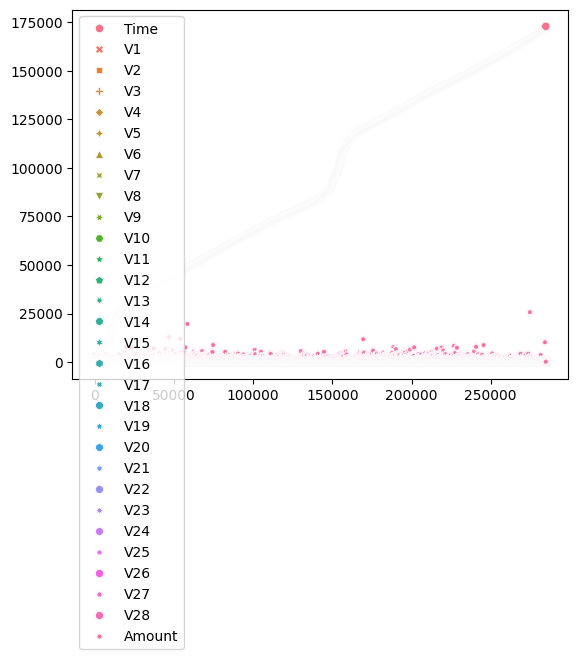

In [5]:
import seaborn as sns
sns.scatterplot(X_train)
plt.show()

# Hyperparameter

In [6]:
# 1. 학습률
learning_rate=0.01
linear_learing_rate = learning_rate * (1 - small_t/epoch) #small_t 설정

# 2. 배치크기
batch_size = 2**17 #13만 #train 데이터의 약 50%크기

# 3. 반복횟수
epoch = 5

# 4. 손실함수
# from tensorflow.keras.losses import BinaryCrossentropy
# loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# 5. 가중치 초기화
dims = [4096] * 7
hs = []
x = np.random.randn(16, dims[0])
for d_in, d_out in zip(dims[:-1], dims[1:]):
  W = np.random.randn(d_in, d_out)/ np.sqrt(2/d_in) #가중치 초기화
  x = np.maximum(0, x.dot(W))
  hs.append(x)

# 6. 드롭아웃
drop_out=0.1 #숫자는 계속 수정해보면서 최적의 결과 도출해내기

SyntaxError: invalid syntax (<ipython-input-6-18e2ca709018>, line 13)

# model 구축

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))  # 첫 번째 은닉층
model.add(Dense(64, activation='relu'))  # 두 번째 은닉층
model.add(Dense(32, activation='relu'))  # 세 번째 은닉층
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 14,337 (56.00 KB)

 Non-trainable params: 0 (0.00 B)

# 최적화

In [ ]:
model.compile(optimizer = "adam",
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Training

In [ ]:
history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_train, y_train))

# Test

# accuracy 검증


In [ ]:
# confusion_matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cnf_matrix = confusion_matrix(y_actual, y_pred, labels = ['cat', 'dog', 'rabbit'])
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['cat', 'dog', 'rabbit'], title = 'confusion matrix without normalization')
plt.show()

# 분류지표 계산
print(classification_report(y_train, y_train_pred))

# ROC(필요하면 쓰기)
from sklearn.metrics import roc_curve, auc
import pandas as pd

y_train_prob = lr.predict_proba(X_train)[:, 1]

fpr, tpr, threshold = roc_curve(y_train, y_train_prob)

a=pd.DataFrame()

a['fpr'] = 1-fpr
a['tpr'] = tpr
a['thres'] = threshold
# p(a)

import matplotlib.pyplot as plt

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='auc: %.2f'%auc_score)
plt.show()

# Visualization

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label = "train") #그래프모양 변경가능
plt.xlabel("Epochs") # 변수수정
plt.ylabel("Cost") #변수수정
plt.legend()
plt.show()